## 1K  plots

In [1]:
from df_utils import load_df
from crawl_ids import CrawlRokuTop1K
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Load Roku TCP connection data from 1K crawl

In [2]:
roku_tcp = load_df(CrawlRokuTop1K, "tcp_conn")

### Take channels with playback

In [3]:
playback = roku_tcp[roku_tcp.playback]
playback.channel_id.nunique(), roku_tcp.channel_id.nunique()

(677, 1000)

### Take channels from top ten categories

In [5]:
playback.drop_duplicates("channel_id").category.value_counts().head(10)

News & Weather      175
Movies & TV         131
Kids & Family        68
Religious            64
Games                47
Special Interest     32
Lifestyle            22
Music                22
Sports               21
International        18
Name: category, dtype: int64

In [6]:
top_ten_categories = list(playback.drop_duplicates("channel_id").category.value_counts().head(10).index)

In [7]:
playback_top_ten = playback[playback.category.isin(top_ten_categories)]
len(playback_top_ten)

35057

### Adblocked connections

In [8]:
playback_top_ten.adblocked.value_counts()

False    27003
True      8054
Name: adblocked, dtype: int64

In [9]:
playback_top_ten_blocked = playback_top_ten[playback_top_ten.adblocked]

### Groupby - Number of trackers per channel

In [13]:
df = playback_top_ten_blocked.drop_duplicates(subset=["channel_name", "domain"]).\
    groupby(["channel_id", "category", "rank"]).size().reset_index(name="# tracker domains").\
    sort_values(by=['# tracker domains'], ascending=False)


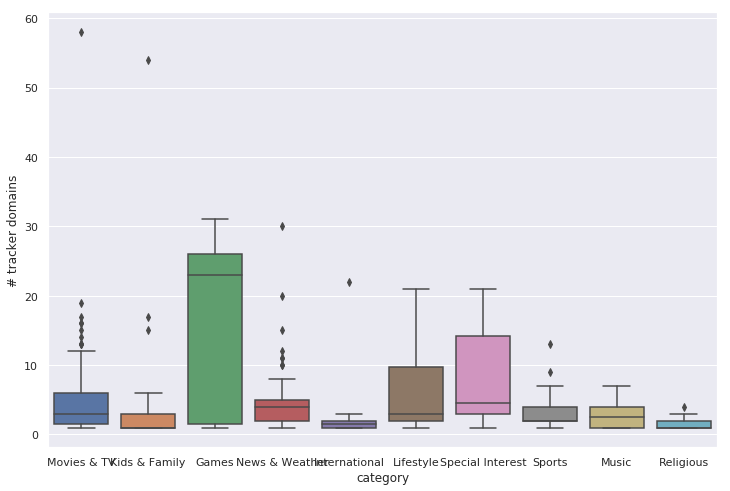

In [14]:
sns.set(rc={'figure.figsize':(12,8)}, style="darkgrid")
sns.set(font_scale = 1)
ax = sns.boxplot(x="category", y="# tracker domains", data=df)

(0, 1287.07)

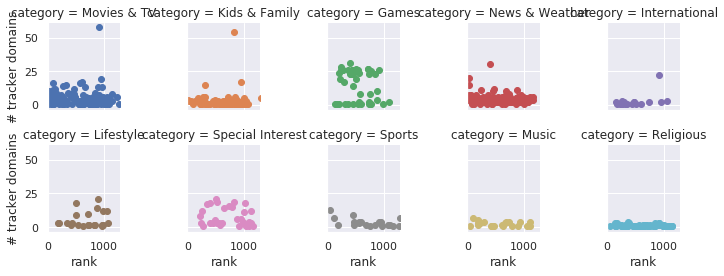

In [15]:
g = sns.FacetGrid(df, col="category", col_wrap=5, height=2, hue="category")
g.map(plt.scatter, "rank", "# tracker domains")
plt.xlim(0, df['rank'].quantile(0.99))  # set x lim to 99th quantile

/usr/local/lib/python3.6/dist-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(0, 1287.07)

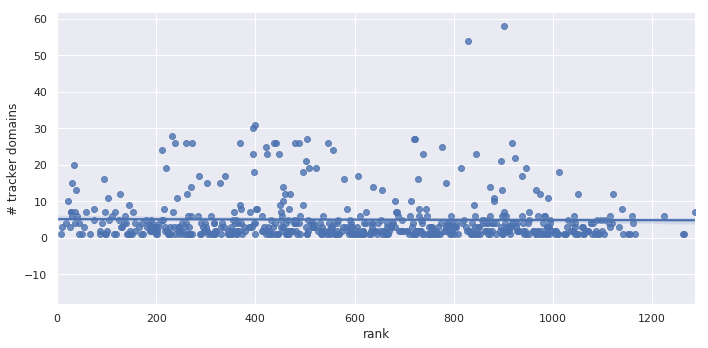

In [18]:
sns.lmplot(x="rank", y="# tracker domains", data=df, size=5, aspect=2)
plt.xlim(0, df['rank'].quantile(0.99))  # set x lim to 99th quantile